In [1]:
%matplotlib notebook

In [2]:
#Datasource: Crime Incidents in 2019 - Washington DC
#URL: http://opendata.dc.gov/datasets/crime-incidents-in-2019/data


# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import json
import gmaps as gmaps



import random
import requests
#from googlesearch import search 


from pprint import pprint

# Google developer API key
import sys
sys.path.append('../')
from config import gkey


In [3]:
#Load Data

df = pd.read_csv("dccrime2019.csv")
df.head(2)


,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,-77.028093,38.919946,19007037,2019-01-12T16:24:37.000Z,EVENING,OTHERS,THEFT F/AUTO,2200 - 2299 BLOCK OF 12TH STREET NW,397564.0,139119.0,...,004400 1,4400.0,Precinct 22,38.919938,-77.028091,NaN,2019-01-12T14:53:54.000Z,2019-01-12T15:44:38.000Z,262355588,19007037-01
1,-77.022439,38.909651,19007042,2019-01-12T15:37:11.000Z,EVENING,OTHERS,THEFT/OTHER,700 - 799 BLOCK OF P STREET NW,398054.0,137976.0,...,004901 2,4901.0,Precinct 18,38.909643,-77.022437,NaN,2019-01-12T14:45:40.000Z,NaN,262355589,19007042-01


In [4]:
# Collecting a list of all columns within the DataFrame
df.columns

Index(['X', 'Y', 'CCN', 'REPORT_DAT', 'SHIFT', 'METHOD', 'OFFENSE', 'BLOCK',
       'XBLOCK', 'YBLOCK', 'WARD', 'ANC', 'DISTRICT', 'PSA',
       'NEIGHBORHOOD_CLUSTER', 'BLOCK_GROUP', 'CENSUS_TRACT',
       'VOTING_PRECINCT', 'LATITUDE', 'LONGITUDE', 'BID', 'START_DATE',
       'END_DATE', 'OBJECTID', 'OCTO_RECORD_ID'],
      dtype='object')

In [5]:
# Reorganizing the columns using double brackets
crime_data = df[["OFFENSE","SHIFT","VOTING_PRECINCT","WARD","BLOCK","LATITUDE","LONGITUDE"]]
crime_data.head()

,OFFENSE,SHIFT,VOTING_PRECINCT,WARD,BLOCK,LATITUDE,LONGITUDE
0,THEFT F/AUTO,EVENING,Precinct 22,1,2200 - 2299 BLOCK OF 12TH STREET NW,38.919938,-77.028091
1,THEFT/OTHER,EVENING,Precinct 18,6,700 - 799 BLOCK OF P STREET NW,38.909643,-77.022437
2,THEFT F/AUTO,MIDNIGHT,Precinct 35,1,1737 - 1776 BLOCK OF COLUMBIA ROAD NW,38.923862,-77.040881
3,THEFT/OTHER,EVENING,Precinct 91,6,1350 - 1399 BLOCK OF POTOMAC AVENUE SE,38.879809,-76.986781
4,HOMICIDE,MIDNIGHT,Precinct 81,6,1700 - 1799 BLOCK OF BENNING ROAD NE,38.899248,-76.978419


In [6]:
a = crime_data["WARD"].nunique()
x = crime_data["OFFENSE"].count()
y = crime_data["VOTING_PRECINCT"].nunique()
z = crime_data["OFFENSE"].nunique()

avg = round(x/y)
avg = int(avg)

print(f"There are {x} crimes in this dataset.")
print(f"There are {z} distinct crimes in this dataset.")
print(f"There are {y} precincts in this dataset.")
print(f"There are {a} wards in this dataset.")
print(f"There is an average of {avg} crimes per precinct in this dataset.")

#print(f"The average number of crimes per precinct are {z} in this dataset")

There are 5161 crimes in this dataset.
There are 8 distinct crimes in this dataset.
There are 143 precincts in this dataset.
There are 8 wards in this dataset.
There is an average of 36 crimes per precinct in this dataset.


In [7]:
#Crime types

offense = crime_data["OFFENSE"].value_counts()
offense

THEFT/OTHER                   2102
THEFT F/AUTO                  1909
MOTOR VEHICLE THEFT            332
ROBBERY                        289
ASSAULT W/DANGEROUS WEAPON     238
BURGLARY                       233
HOMICIDE                        30
SEX ABUSE                       28
Name: OFFENSE, dtype: int64

In [8]:
#Crime Precinct

precinct = crime_data["VOTING_PRECINCT"].value_counts()

precinct.head(5)


Precinct 129    318
Precinct 17     196
Precinct 83     147
Precinct 72     120
Precinct 137    110
Name: VOTING_PRECINCT, dtype: int64

In [9]:
#Crime Ward

ward = crime_data["WARD"].value_counts()

ward.head(10)


2    1087
6     822
5     816
1     684
7     557
8     426
4     396
3     373
Name: WARD, dtype: int64

In [10]:
sexcrimes = crime_data.loc[crime_data["OFFENSE"]=="SEX ABUSE"]

sexcrimes.head(5)

,OFFENSE,SHIFT,VOTING_PRECINCT,WARD,BLOCK,LATITUDE,LONGITUDE
344,SEX ABUSE,EVENING,Precinct 120,8,1100 - 1199 BLOCK OF ALABAMA AVENUE SE,38.844217,-76.991130
399,SEX ABUSE,EVENING,Precinct 126,8,100 - 199 BLOCK OF IVANHOE STREET SW,38.821308,-77.009005
866,SEX ABUSE,DAY,Precinct 9,3,4900 - 4908 BLOCK OF MASSACHUSETTS AVENUE NW,38.946044,-77.097049
1317,SEX ABUSE,DAY,Precinct 3,2,800 - 899 BLOCK OF NEW HAMPSHIRE AVENUE NW,38.900130,-77.052361
1602,SEX ABUSE,EVENING,Precinct 94,7,920 - 999 BLOCK OF 52ND STREET NE,38.903279,-76.925121


In [11]:
# Collecting a list of all columns within the DataFrame
sexcrimes.columns

Index(['OFFENSE', 'SHIFT', 'VOTING_PRECINCT', 'WARD', 'BLOCK', 'LATITUDE',
       'LONGITUDE'],
      dtype='object')

In [12]:
sexcrimesprecinct = sexcrimes["VOTING_PRECINCT"].value_counts()

In [13]:
sexcrimesprecinct.head(2)

Precinct 126    3
Precinct 143    2
Name: VOTING_PRECINCT, dtype: int64

In [14]:
sexcrimesward = sexcrimes["WARD"].value_counts()

In [15]:
print(sexcrimesward)

7    5
5    5
2    5
8    4
6    4
4    2
3    2
1    1
Name: WARD, dtype: int64


In [16]:
#Ward 2 data

Ward2 = crime_data.loc[crime_data["WARD"]==2]

Ward2.head()

,OFFENSE,SHIFT,VOTING_PRECINCT,WARD,BLOCK,LATITUDE,LONGITUDE
7,THEFT/OTHER,EVENING,Precinct 129,2,800 - 899 BLOCK OF 7TH STREET NW,38.900338,-77.021915
10,THEFT F/AUTO,MIDNIGHT,Precinct 141,2,1700 - 1780 BLOCK OF U STREET NW,38.916998,-77.039851
12,THEFT F/AUTO,EVENING,Precinct 14,2,1300 - 1318 BLOCK OF 19TH STREET NW,38.907565,-77.043443
14,THEFT/OTHER,EVENING,Precinct 129,2,1200 - 1299 BLOCK OF G STREET NW,38.898309,-77.028854
31,THEFT F/AUTO,MIDNIGHT,Precinct 17,2,1900 - 1999 BLOCK OF N STREET NW,38.907241,-77.044169


In [17]:
Ward2offense = Ward2["OFFENSE"].value_counts()
Ward2offense

THEFT/OTHER                   544
THEFT F/AUTO                  442
ROBBERY                        32
BURGLARY                       29
MOTOR VEHICLE THEFT            23
ASSAULT W/DANGEROUS WEAPON     12
SEX ABUSE                       5
Name: OFFENSE, dtype: int64

In [18]:
#Ward 3 data

Ward3 = crime_data.loc[crime_data["WARD"]==3]

Ward3.head()

,OFFENSE,SHIFT,VOTING_PRECINCT,WARD,BLOCK,LATITUDE,LONGITUDE
32,MOTOR VEHICLE THEFT,MIDNIGHT,Precinct 11,3,3900 - 4099 BLOCK OF DAVIS PLACE NW,38.923618,-77.078890
41,THEFT/OTHER,DAY,Precinct 26,3,2650 - 2699 BLOCK OF CONNECTICUT AVENUE NW,38.925200,-77.052495
61,BURGLARY,EVENING,Precinct 32,3,5100 - 5199 BLOCK OF 39TH STREET NW,38.956634,-77.077150
69,THEFT/OTHER,EVENING,Precinct 32,3,5523 - 5599 BLOCK OF CONNECTICUT AVENUE NW,38.964445,-77.075313
95,THEFT/OTHER,DAY,Precinct 26,3,2600 - 2649 BLOCK OF CONNECTICUT AVENUE NW,38.924191,-77.051906


In [19]:
crime_data.groupby(["VOTING_PRECINCT","OFFENSE"]).size()

VOTING_PRECINCT  OFFENSE                   
Precinct 1       ASSAULT W/DANGEROUS WEAPON     2
                 MOTOR VEHICLE THEFT            2
                 ROBBERY                        1
                 THEFT F/AUTO                  24
                 THEFT/OTHER                   18
Precinct 10      MOTOR VEHICLE THEFT            1
                 SEX ABUSE                      1
                 THEFT F/AUTO                   8
                 THEFT/OTHER                    2
Precinct 100     ASSAULT W/DANGEROUS WEAPON     3
                 BURGLARY                       3
                 MOTOR VEHICLE THEFT            4
                 ROBBERY                        7
                 THEFT F/AUTO                   4
                 THEFT/OTHER                    4
Precinct 101     MOTOR VEHICLE THEFT            2
                 ROBBERY                        1
                 THEFT F/AUTO                   6
                 THEFT/OTHER                    5
Precin

In [20]:
p129 = crime_data.loc[crime_data["VOTING_PRECINCT"]=="Precinct 129"]

In [21]:
p129offense = p129["OFFENSE"].value_counts()
p129offense

THEFT/OTHER                   176
THEFT F/AUTO                  119
ROBBERY                        12
MOTOR VEHICLE THEFT             6
ASSAULT W/DANGEROUS WEAPON      3
BURGLARY                        2
Name: OFFENSE, dtype: int64

In [22]:
p129.groupby(["OFFENSE", "SHIFT"]).size()


OFFENSE                     SHIFT   
ASSAULT W/DANGEROUS WEAPON  EVENING      1
                            MIDNIGHT     2
BURGLARY                    DAY          1
                            EVENING      1
MOTOR VEHICLE THEFT         EVENING      4
                            MIDNIGHT     2
ROBBERY                     DAY          2
                            EVENING      7
                            MIDNIGHT     3
THEFT F/AUTO                DAY         36
                            EVENING     47
                            MIDNIGHT    36
THEFT/OTHER                 DAY         52
                            EVENING     99
                            MIDNIGHT    25
dtype: int64

In [23]:
#Precinct 83 is the Union Station area
p83 = crime_data.loc[crime_data["VOTING_PRECINCT"]=="Precinct 83"]

p83.groupby(["OFFENSE", "SHIFT"]).size()

OFFENSE                     SHIFT   
ASSAULT W/DANGEROUS WEAPON  EVENING      1
BURGLARY                    DAY          4
MOTOR VEHICLE THEFT         DAY          1
                            EVENING      3
ROBBERY                     DAY          2
                            EVENING      1
                            MIDNIGHT     6
THEFT F/AUTO                DAY         15
                            EVENING     12
                            MIDNIGHT     7
THEFT/OTHER                 DAY         34
                            EVENING     49
                            MIDNIGHT    12
dtype: int64

In [24]:
#Precinct 17 is the downtown area
p17 = crime_data.loc[crime_data["VOTING_PRECINCT"]=="Precinct 17"]

p17.groupby(["OFFENSE", "SHIFT"]).size()

OFFENSE                     SHIFT   
ASSAULT W/DANGEROUS WEAPON  DAY          1
                            EVENING      1
BURGLARY                    DAY          7
MOTOR VEHICLE THEFT         DAY          1
                            MIDNIGHT     1
ROBBERY                     EVENING      2
                            MIDNIGHT     1
THEFT F/AUTO                DAY         19
                            EVENING     22
                            MIDNIGHT    20
THEFT/OTHER                 DAY         38
                            EVENING     64
                            MIDNIGHT    19
dtype: int64

In [25]:
df_sexcrime = crime_data.loc[crime_data["OFFENSE"]=="SEX ABUSE"]
df_theftother = crime_data.loc[crime_data["OFFENSE"]=="THEFT/OTHER"]
df_robbery = crime_data.loc[crime_data["OFFENSE"]=="ROBBERY"]
df_theftauto = crime_data.loc[crime_data["OFFENSE"]=="THEFT F/AUTO"]
df_burglary = crime_data.loc[crime_data["OFFENSE"]=="BURGLARY"]



In [26]:
#Wards and type of offenses
df_burglary.groupby(["WARD","OFFENSE"]).size()


WARD  OFFENSE 
1     BURGLARY    28
2     BURGLARY    29
3     BURGLARY    22
4     BURGLARY    31
5     BURGLARY    42
6     BURGLARY    18
7     BURGLARY    30
8     BURGLARY    33
dtype: int64

In [27]:
#Wards and type of offenses
crime_data.groupby(["WARD","VOTING_PRECINCT"]).size()


WARD  VOTING_PRECINCT
1     Precinct 137       109
      Precinct 20         20
      Precinct 22         98
      Precinct 23         18
      Precinct 24         16
      Precinct 25         39
      Precinct 35         38
      Precinct 36         41
      Precinct 37         81
      Precinct 38         41
      Precinct 39         85
      Precinct 40         19
      Precinct 41         37
      Precinct 42         19
      Precinct 43         23
2     Precinct 129       318
      Precinct 13          9
      Precinct 14         87
      Precinct 141        56
      Precinct 143        30
      Precinct 15         25
      Precinct 16         91
      Precinct 17        196
      Precinct 2          31
      Precinct 3          18
      Precinct 4          40
      Precinct 5         100
      Precinct 6          86
3     Precinct 10         12
      Precinct 11         36
                        ... 
7     Precinct 111        24
      Precinct 113        42
      Precinct 132   

In [28]:
# Create a group based on the values in the 'Offense' column
offense_group = crime_data.groupby('OFFENSE')

# Count how many times each offense appears in our group
count_offense = offense_group['OFFENSE'].count()

count_offense

OFFENSE
ASSAULT W/DANGEROUS WEAPON     238
BURGLARY                       233
HOMICIDE                        30
MOTOR VEHICLE THEFT            332
ROBBERY                        289
SEX ABUSE                       28
THEFT F/AUTO                  1909
THEFT/OTHER                   2102
Name: OFFENSE, dtype: int64

<IPython.core.display.Javascript object>


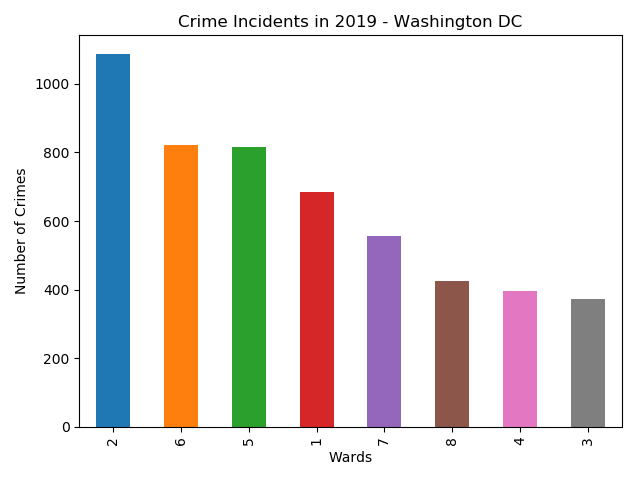

In [29]:
# Create a bar chart based off of the group series from before
count_chart = ward.plot(kind='bar')

# Set the xlabel and ylabel using class methods
plt.title("Crime Incidents in 2019 - Washington DC")
#count_chart.set_xticks([offense_group['OFFENSE'].count()])
count_chart.set_xlabel("Wards")
count_chart.set_ylabel("Number of Crimes")

   

plt.show()
plt.tight_layout()
plt.savefig("dccrime2019_wards.png")

In [30]:
# Export file as a CSV, without the Pandas index, but with the header
crime_data.to_csv("DCCrimes2019_cleaned.csv", index=False, header=True)